/Users/letizialibrobuono/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[*********************100%%**********************]  1 of 1 completed


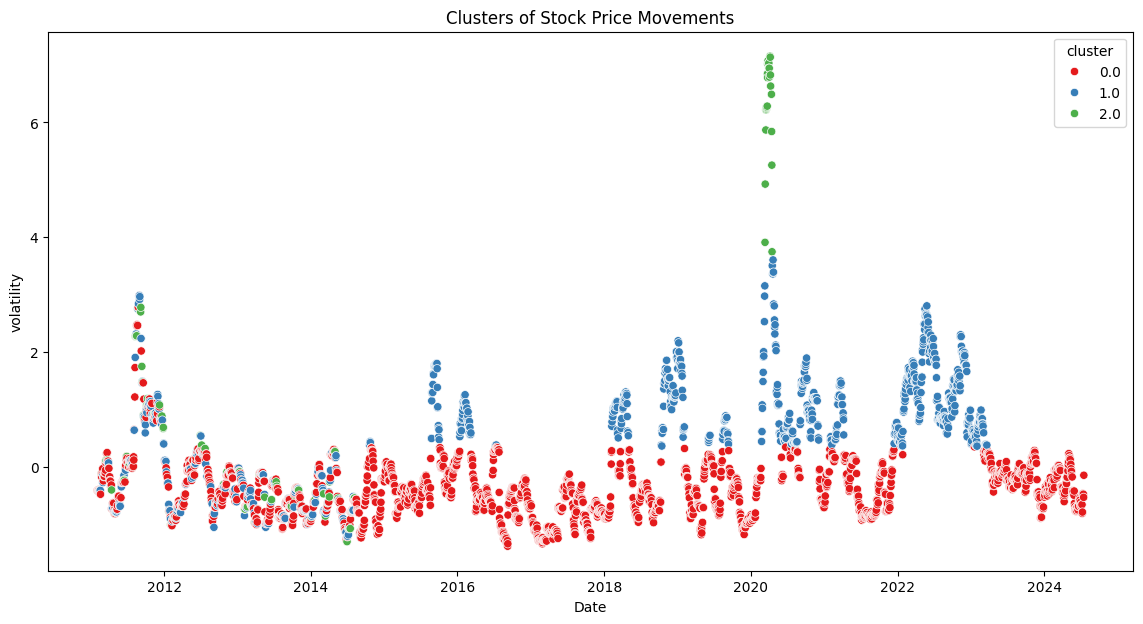

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Scarica i dati
data = yf.download('TQQQ', start='2011-01-01', end='2024-12-31')

data["returns"] = data["Close"].pct_change()
data["volatility"] = data["returns"].rolling(window=22).std()

data.dropna(inplace=True)

# Standardizza i dati
scaler = StandardScaler()
features = ["volatility"]
data[features] = scaler.fit_transform(data[features])

# Parametri della finestra
window_size = 2500  # Dimensione della finestra
n_clusters = 3  # Numero di cluster

# Inizializza una colonna per i cluster
data["cluster"] = np.nan

# Applica il K-means su finestre mobili
for start in range(0, len(data) - window_size):
    end = start + window_size
    window_data = data.iloc[start:end]
    kmeans = KMeans(n_clusters=n_clusters)
    data.loc[data.index[start:end], "cluster"] = kmeans.fit_predict(window_data[features])

# Visualizza i risultati
plt.figure(figsize=(14, 7))
sns.scatterplot(x=data.index, y=data['volatility'], hue=data['cluster'], palette='Set1', legend='full')
plt.title('Clusters of Stock Price Movements')
plt.show()


In [2]:
data["signal"] = data["cluster"].shift(1)

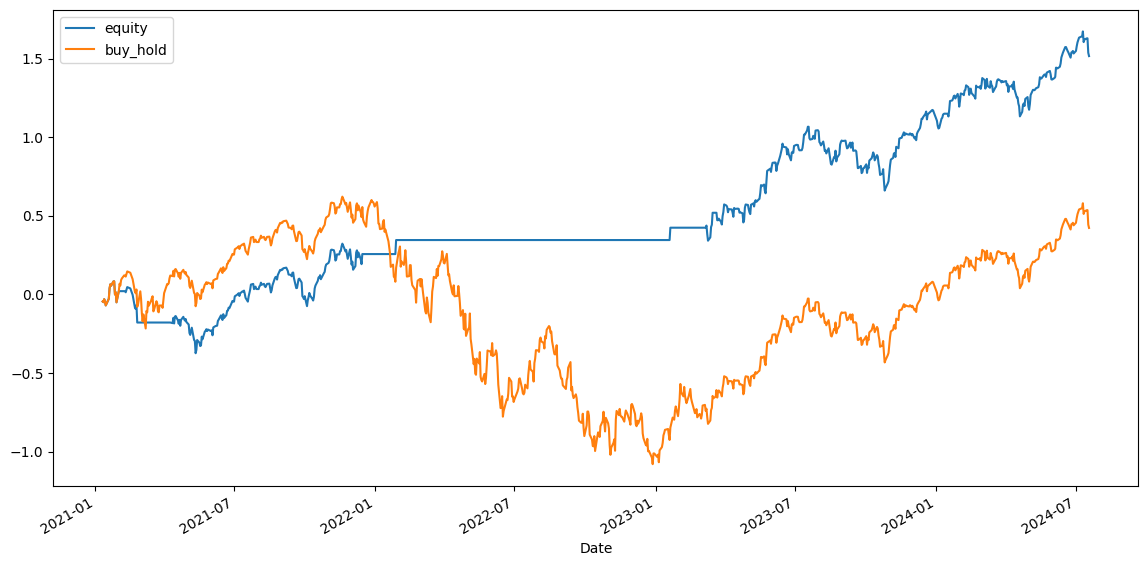

In [7]:
data["strategy"] = np.where(data["signal"] == 0, data["returns"], 0)

data["equity"] = (1 + data["strategy"][2500:]).cumprod()
data["buy_hold"] = (1 + data["returns"][2500:]).cumprod()

plt.figure(figsize=(14, 7))
np.log(data["equity"]).plot()
np.log(data["buy_hold"]).plot()
legend = plt.legend()

<Axes: xlabel='Date'>

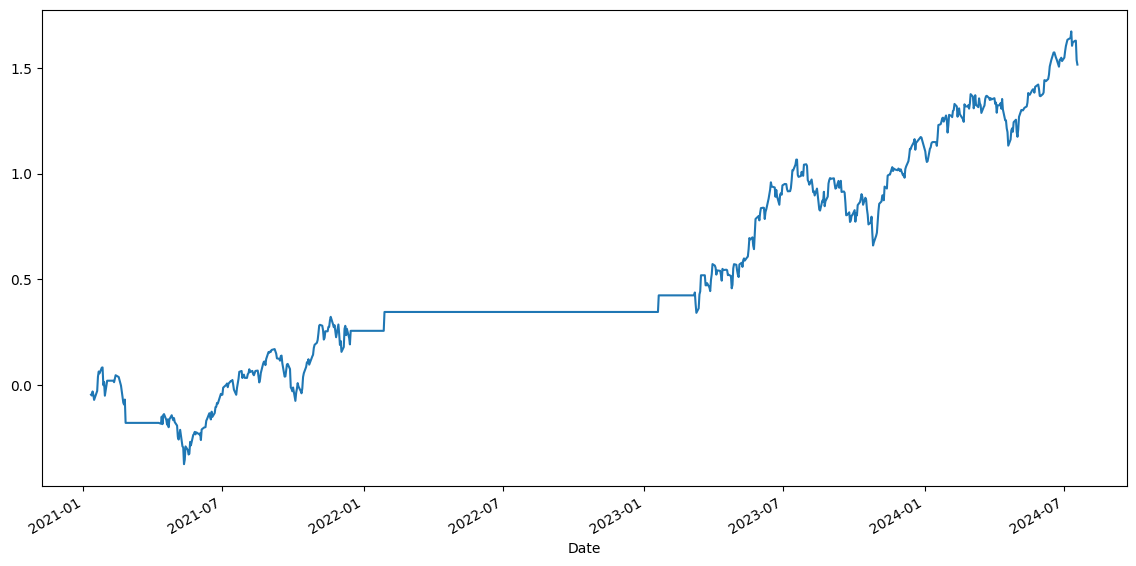

In [8]:
plt.figure(figsize=(14, 7))
np.log(data["equity"]).plot()

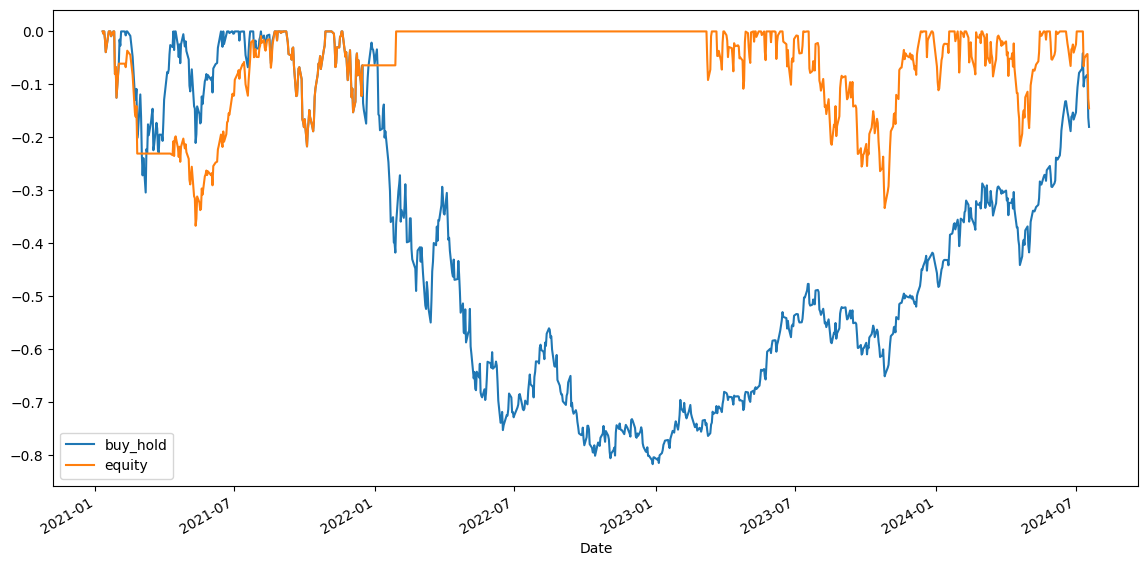

In [9]:
DD_buy_hold = (data["buy_hold"] / data["buy_hold"].cummax() - 1)
DD_strategy = (data["equity"] / data["equity"].cummax() - 1)

plt.figure(figsize=(14, 7))
DD_buy_hold.plot()
DD_strategy.plot()
legend = plt.legend()


In [10]:
DD_max_buy_hold = DD_buy_hold.min()
DD_max_strategy = DD_strategy.min()

DD_max_buy_hold, DD_max_strategy

(-0.8175454453754905, -0.36716672762910285)